In [18]:
%matplotlib inline

#import dependencies
import pandas as pd
import psycopg2
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import session
from sqlalchemy import create_engine, func
import matplotlib.pyplot as plt

In [5]:
host_address = 'bootcamp-final-project.c8u2worjd1ui.us-east-1.rds.amazonaws.com'
port = '5432'
username = 'peter_jennifer'
password = 'Puhj6k2%pbW'
db = 'us_gun_violence'


In [6]:
# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(
                username=username,
                password=password,
                ipaddress=host_address,
                port=port,
                dbname=db))
# Create the connection
engine = create_engine(postgres_str)

In [9]:
suspects_df = pd.read_sql_query('''SELECT * FROM suspects;''', engine)
incidents_df = pd.read_sql_query('''SELECT * FROM incidents''', engine)
guns_df = pd.read_sql_query('''SELECT * FROM guns''', engine)

In [12]:
guns_df_dup = guns_df.drop_duplicates(subset='incident_id')
guns_df_dup

,gun_index,incident_id,n_guns_involved,gun_stolen,gun_type
0,0,478855,2,Unknown,Unknown
2,2,478959,2,Unknown,Handgun
4,4,479363,2,Unknown,22 LR
6,6,491674,1,Unknown,Unknown
7,7,479413,1,Unknown,Unknown
...,...,...,...,...,...
192446,192446,1083142,1,Unknown,Unknown
192447,192447,1083139,1,Unknown,Unknown
192448,192448,1083151,1,Unknown,Unknown
192449,192449,1082514,1,Unknown,Unknown


In [14]:
suspects_df

,suspect_index,incident_id,participant_gender,participant_age,participant_age_group,participant_status
0,0,461105,Female,NaN,Adult 18+,Injured
1,1,478855,Male,25.0,Adult 18+,"Injured, Unharmed, Arrested"
2,2,478855,Male,31.0,Adult 18+,"Unharmed, Arrested"
3,3,478925,Male,33.0,Adult 18+,Killed
4,4,478959,Female,47.0,Adult 18+,Killed
...,...,...,...,...,...,...
193244,193244,1081752,Male,NaN,Adult 18+,Unharmed
193245,193245,1082061,Male,48.0,Adult 18+,"Unharmed, Arrested"
193246,193246,1083142,Female,25.0,Adult 18+,"Unharmed, Arrested"
193247,193247,1083139,Male,21.0,Adult 18+,"Unharmed, Arrested"


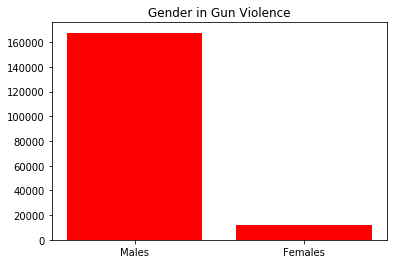

In [21]:
#male vs female
count = suspects_df.participant_gender.value_counts()
counts = [167708, 11746]
labels = ['Males', 'Females']

plt.bar(labels, counts, color='r')
plt.xticks(labels)
plt.title('Gender in Gun Violence')

plt.show()